**Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier

**Load CSV file**

In [ ]:
data = pd.read_csv('Stress-Lysis.csv')

In [ ]:
data.head()

,Humidity,Temperature,Step_count,Stress_Level
0,21.33,90.33,123,1
1,21.41,90.41,93,1
2,27.12,96.12,196,2
3,27.64,96.64,177,2
4,10.87,79.87,87,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Humidity      2001 non-null   float64
 1   Temperature   2001 non-null   float64
 2   Step_count    2001 non-null   int64  
 3   Stress_Level  2001 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 62.7 KB


**DATA CLEANNING**

**Checking duplicate values**

In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data.shape

(2001, 4)

In [ ]:
data.dtypes

,0
Humidity,float64
Temperature,float64
Step_count,int64
Stress_Level,int64


**Checking missing values**

In [ ]:
data.isnull().sum()

,0
Humidity,0
Temperature,0
Step_count,0
Stress_Level,0


In [ ]:
data['Stress_Level'].unique()

array([1, 2, 0])

In [ ]:
correlation = data.corr()
correlation

,Humidity,Temperature,Step_count,Stress_Level
Humidity,1.000000,1.000000,0.870486,0.936036
Temperature,1.000000,1.000000,0.870486,0.936036
Step_count,0.870486,0.870486,1.000000,0.832623
Stress_Level,0.936036,0.936036,0.832623,1.000000


**Pivot Tables**

In [ ]:
pivot1 = data.pivot_table(values='Step_count', index='Stress_Level', aggfunc='mean')
print(pivot1)

              Step_count
Stress_Level            
0              42.934132
1              78.130380
2             165.000000


In [ ]:
pivot2 = data.pivot_table(values=['Humidity', 'Temperature'], index='Stress_Level', aggfunc='mean')
print(pivot2)

              Humidity  Temperature
Stress_Level                       
0               12.500       81.500
1               18.955       87.955
2               26.455       95.455


**Visualizations**

<Axes: xlabel='Stress_Level', ylabel='Count'>

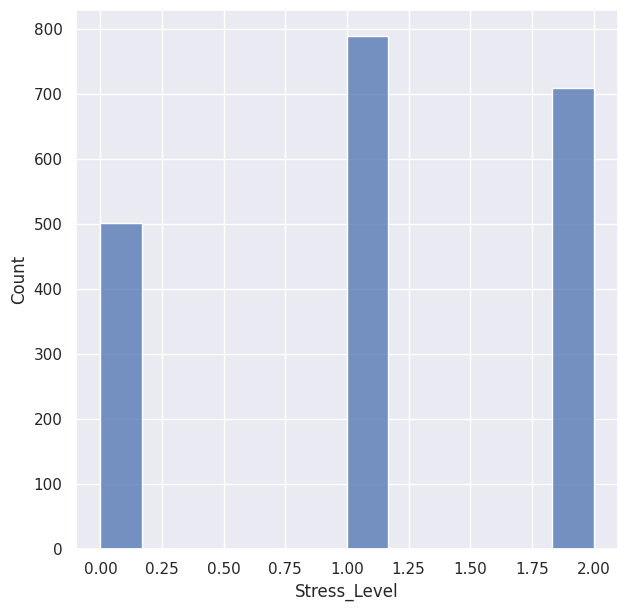

In [ ]:
plt.figure(figsize=(7,7))
sns.set(font_scale=1)
sns.histplot(data=data, x='Stress_Level')

<Axes: ylabel='Temperature'>

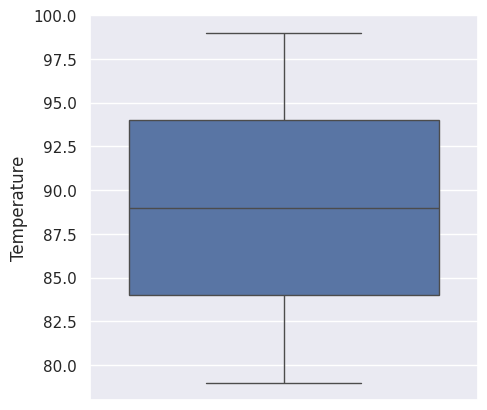

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(data['Temperature'])

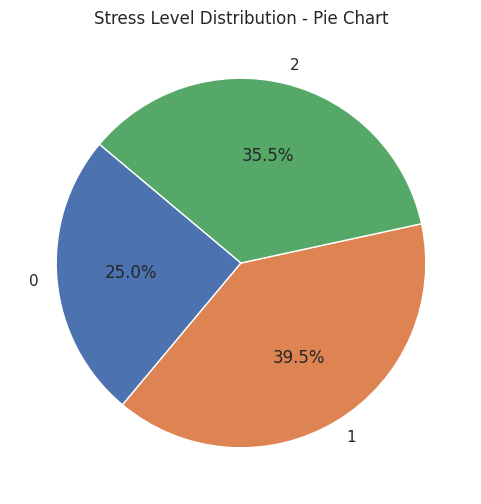

In [ ]:
stress_counts = data['Stress_Level'].value_counts().sort_index()
plt.figure(figsize=(6, 6))
plt.pie(stress_counts, labels=stress_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Stress Level Distribution - Pie Chart')
plt.show()


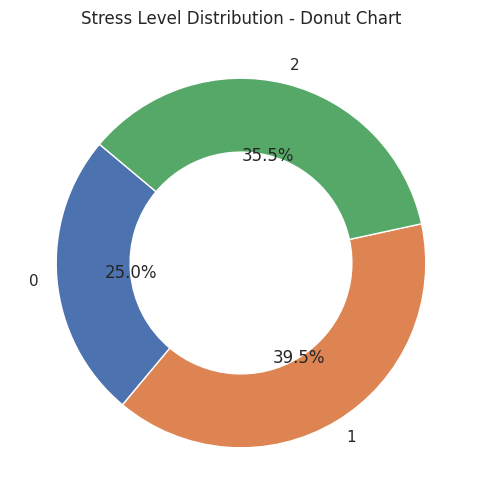

In [ ]:
plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(
    stress_counts,
    labels=stress_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops=dict(width=0.4)
)
plt.title('Stress Level Distribution - Donut Chart')
plt.show()


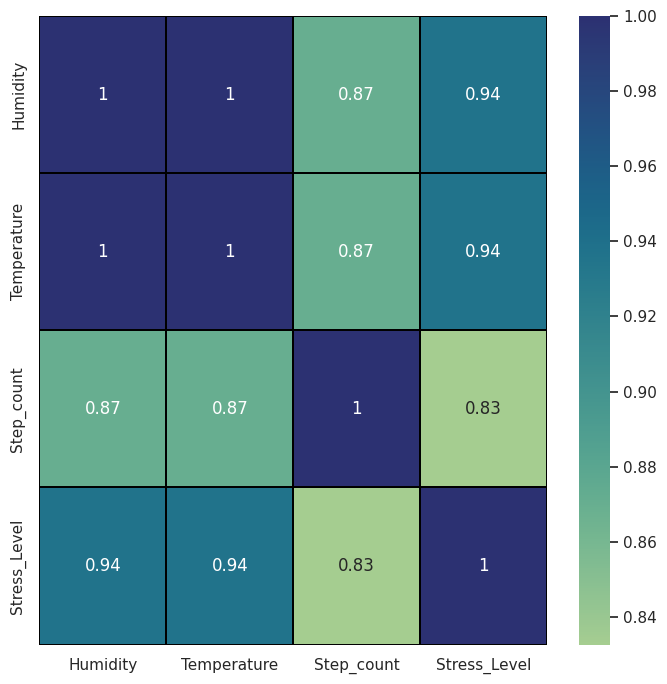

In [ ]:
plt.figure(figsize=(7, 7))
sns.heatmap(correlation, annot=True, cmap='crest', linewidths=0.2, linecolor='black')
plt.tight_layout()
plt.show()


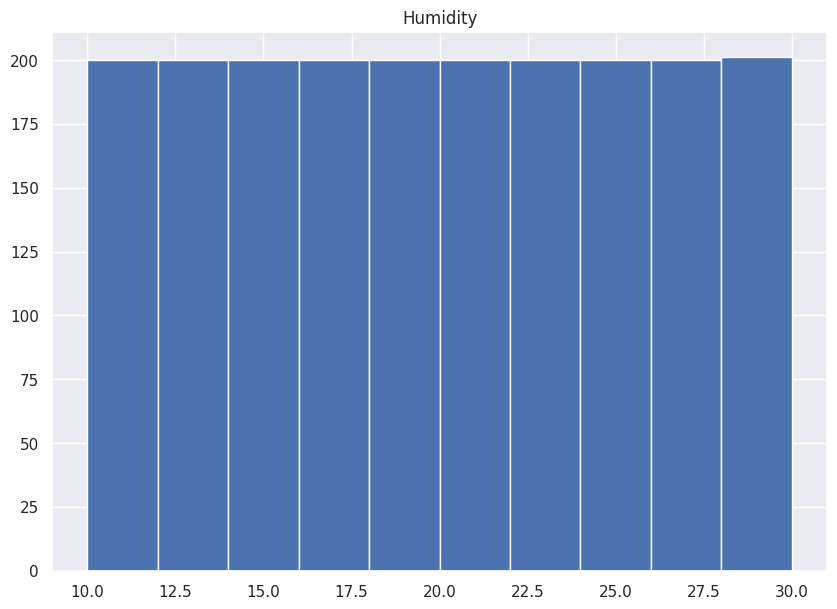

In [ ]:
column = 'Humidity'
plt.figure(figsize=(10, 7))
plt.hist(data[column])
plt.title(column)
plt.show()

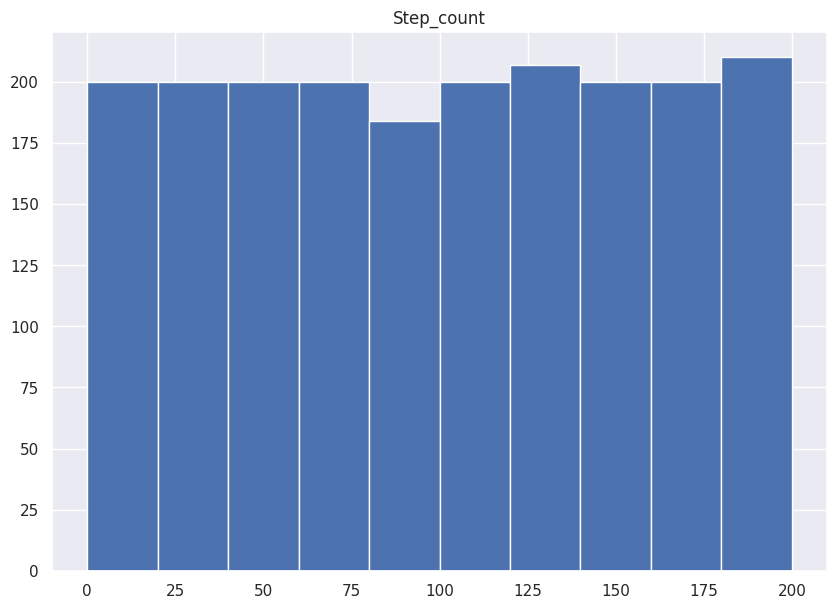

In [ ]:
column = 'Step_count'
plt.figure(figsize=(10, 7))
plt.hist(data[column])
plt.title(column)
plt.show()

**DATA PROCESSING AND MODEL TRAINING**

In [ ]:
X=data.drop(['Stress_Level'],axis=1)
y=data['Stress_Level']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

**KNN**

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, knn_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, knn_pred))

KNN Accuracy: 0.9950124688279302
Confusion Matrix:
 [[ 83   0   0]
 [  1 165   0]
 [  0   1 151]]


**Gaussian Naive Bayes**

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_pred = gnb.predict(X_test)
print("\nGaussianNB Accuracy:", accuracy_score(y_test, gnb_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, gnb_pred))


GaussianNB Accuracy: 0.9925187032418953
Confusion Matrix:
 [[ 83   0   0]
 [  3 163   0]
 [  0   0 152]]


**Logistic Regression**

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)
print("\nLogistic Regression Accuracy:", accuracy_score(y_test, logreg_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, logreg_pred))


Logistic Regression Accuracy: 0.9975062344139651
Confusion Matrix:
 [[ 83   0   0]
 [  0 166   0]
 [  0   1 151]]


**Linear Regression**

In [ ]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
linreg_pred = linreg.predict(X_test).round().astype(int)
print("\nLinear Regression Accuracy:", accuracy_score(y_test, linreg_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, linreg_pred))


Linear Regression Accuracy: 0.9750623441396509
Confusion Matrix:
 [[ 83   0   0]
 [  5 161   0]
 [  0   5 147]]


**Support Vector Machine(SVM)**

In [ ]:
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
print("\nSVM Accuracy:", accuracy_score(y_test, svm_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_pred))


SVM Accuracy: 0.9950124688279302
Confusion Matrix:
 [[ 83   0   0]
 [  0 166   0]
 [  0   2 150]]


**Decision Tree**

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
print("\nDecision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_pred))


Decision Tree Accuracy: 1.0
Confusion Matrix:
 [[ 83   0   0]
 [  0 166   0]
 [  0   0 152]]


**Ada Boost**

In [ ]:
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
ada_pred = ada.predict(X_test)
print("\nAdaBoost Accuracy:", accuracy_score(y_test, ada_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, ada_pred))


AdaBoost Accuracy: 0.9975062344139651
Confusion Matrix:
 [[ 83   0   0]
 [  0 166   0]
 [  0   1 151]]


**Random Forest**

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("\nRandom Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))


Random Forest Accuracy: 1.0
Confusion Matrix:
 [[ 83   0   0]
 [  0 166   0]
 [  0   0 152]]


**Gradient Boosting**

In [ ]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
print("\nGradient Boosting Accuracy:", accuracy_score(y_test, gb_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, gb_pred))


Gradient Boosting Accuracy: 1.0
Confusion Matrix:
 [[ 83   0   0]
 [  0 166   0]
 [  0   0 152]]


**Accuracy - Comparision Graph**

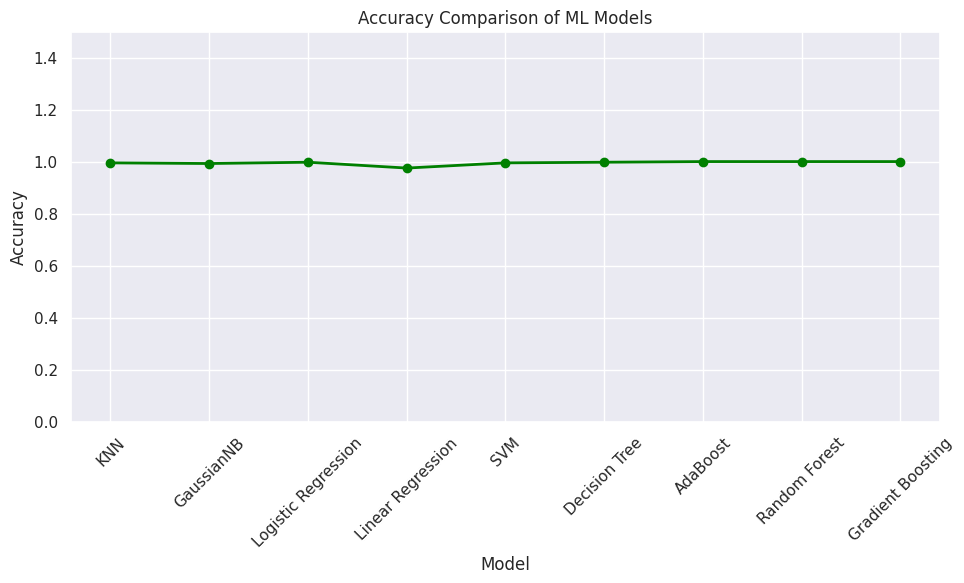

In [ ]:
import matplotlib.pyplot as plt

model_names = [
    'KNN', 'GaussianNB', 'Logistic Regression', 'Linear Regression',
    'SVM', 'Decision Tree', 'AdaBoost', 'Random Forest', 'Gradient Boosting'
]

accuracies = [
    accuracy_score(y_test, knn_pred),
    accuracy_score(y_test, gnb_pred),
    accuracy_score(y_test, logreg_pred),
    accuracy_score(y_test, linreg_pred),
    accuracy_score(y_test, svm_pred),
    accuracy_score(y_test, dt_pred),
    accuracy_score(y_test, da_pred),
    accuracy_score(y_test, rf_pred),
    accuracy_score(y_test, gb_pred)
]

plt.figure(figsize=(10, 5))
plt.plot(model_names, accuracies, marker='o', linestyle='-', color='green', linewidth=2)

plt.title('Accuracy Comparison of ML Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1.5)
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


 Accuracy of KNN, Gaussian NB, Logistic Regression, SVM, Decision Tree, Ada Bost, Random Forest Gradient Boosting have 100%, when compare to Linear regression( 98%)